In [2]:
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
import torchtoolbox.transform as transforms
import torchtoolbox.transform.functional  as F


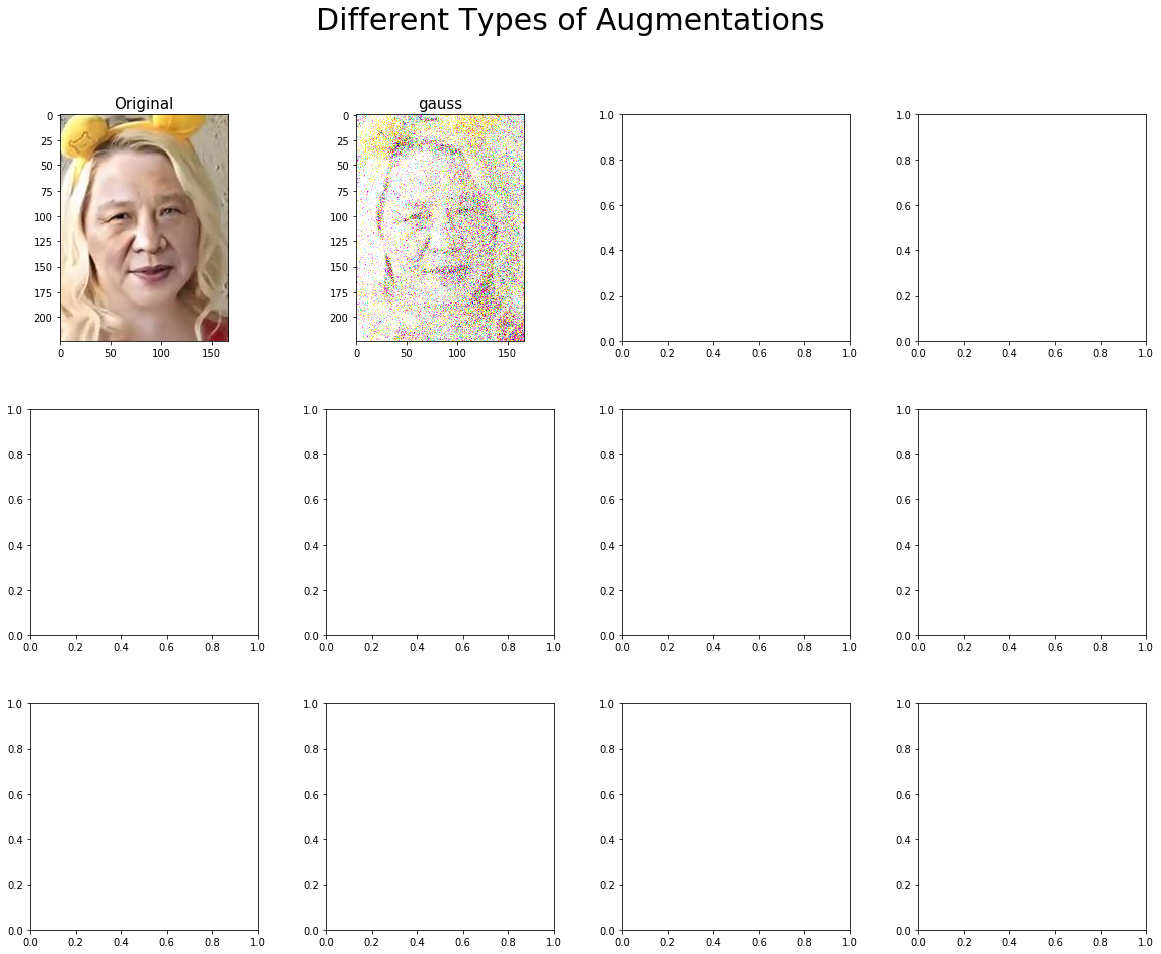

In [4]:
import albumentations as A
# image_folder_path = "/hdd/tam/df_in_the_wild/image/test/0_real/"
image_folder_path = "/hdd/tam/extend_data/extract_download/train/"

chosen_image = cv2.cvtColor(cv2.imread(os.path.join(image_folder_path, "35_354.jpg")),cv2.COLOR_BGR2RGB)
# albumentation_list = [A.RandomSunFlare(p=1), A.RandomFog(p=1), A.RandomBrightness(p=1),
#                       A.RandomCrop(p=1,height = 224, width = 224), A.Rotate(p=1, limit=90),
#                       A.RGBShift(p=1), A.RandomSnow(p=1),
#                       A.HorizontalFlip(p=1), A.VerticalFlip(p=1), A.RandomContrast(limit = 0.5,p = 1),
#                       A.HueSaturationValue(p=1,hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=50),
albumentation_list = [
                     transforms.RandomGaussianNoise(p=1.0,mean=125, std=100)
                     
                     ]

img_matrix_list = []
bboxes_list = []
for aug_type in albumentation_list:
#     print(aug_type)
#     img = aug_type(image = chosen_image)['image']
    img = aug_type(img = chosen_image)
    
#     print(img)
    img_matrix_list.append(img)

img_matrix_list.insert(0,chosen_image)    

# titles_list = ["Original","RandomSunFlare","RandomFog","RandomBrightness",
#                "RandomCrop","Rotate", "RGBShift", "RandomSnow","HorizontalFlip", "VerticalFlip", "RandomContrast","HSV"]
titles_list =  ["Original","gauss"]
##reminder of helper function
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title=""):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=3, ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize = 30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
    plt.show()
    
plot_multiple_img(img_matrix_list, titles_list, ncols = 4,main_title="Different Types of Augmentations")

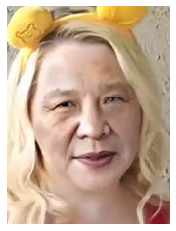

In [42]:
img_bright = F.adjust_brightness(chosen_image, 1)
plt.axis("off")
plt.imshow(img_bright)

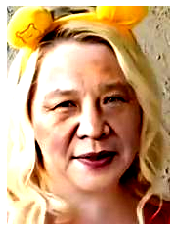

In [44]:
img_bright = F.adjust_contrast(chosen_image, 2)
plt.axis("off")
plt.imshow(img_bright)

In [7]:
img_bright = transforms.RandomErasing(p=0.5, scale=(0.33, 0.33), ratio=(0.5, 0.5))(chosen_image)
plt.axis("off")
plt.imshow(img_bright)

TypeError: img should be Tensor Image. Got <class 'numpy.ndarray'>